In [200]:
%run -i "../scripts/run_inference.py"

Importing & preparing dataloader for INFERENCE data . . . Done

Total of 4 steps

Importing & creating instance of neural network . . . Done

Total of 1000 entries in inference set, with batchsize : 256

Completed run 50/200, Time Taken : 0.0 Mins, 10.16 seconds



KeyboardInterrupt: 

In [199]:
%run -i "../scripts/run_inference.py"

Importing & preparing dataloader for INFERENCE data . . . Done

Total of 8 steps

Importing & creating instance of neural network . . . Done

Total of 1000 entries in inference set, with batchsize : 128

Completed run 50/200, Time Taken : 0.0 Mins, 9.83 seconds



KeyboardInterrupt: 

In [28]:
def incremental_avg(old_n, old_avg, value):
    return old_avg + (value-old_avg) / (old_n+1)

In [11]:
incremental_avg(0, 0, 10)

10.0

In [15]:
vals = []
res = []
for i in range(1, 11):
    vals.append(i)
    res.append(sum(vals)/len(vals))
print(vals)
print(res)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


In [16]:
res = []
old_avg = 0
old_n = 0
for i in range(1, 11):
    old_avg = incremental_avg(old_avg=old_avg, old_n=old_n, value=i)
    res.append(old_avg)
    old_n+=1
print(res)   

[1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5]


In [18]:
round(0.25*10000)

2500

In [22]:
a = [1]

In [23]:
a.append(2)

In [24]:
a

[1, 2]

In [3]:
from sklearn.metrics import classification_report

In [4]:
import pandas as pd

In [6]:
val_df = pd.read_csv("../val_output.csv")
true_labels = val_df['label'].to_list()

In [8]:
threshold = 0.8
val_df['pred_label'] = val_df['pred_score'].apply(lambda x : 1 if x >threshold else 0)
pred_labels = val_df['pred_label'].to_list()

In [9]:
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97     34665
           1       0.47      0.58      0.52      1880

    accuracy                           0.94     36545
   macro avg       0.72      0.77      0.74     36545
weighted avg       0.95      0.94      0.95     36545



In [10]:
threshold = 0.9
val_df['pred_label'] = val_df['pred_score'].apply(lambda x : 1 if x >threshold else 0)
pred_labels = val_df['pred_label'].to_list()

In [11]:
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98     34665
           1       0.58      0.44      0.50      1880

    accuracy                           0.95     36545
   macro avg       0.77      0.71      0.74     36545
weighted avg       0.95      0.95      0.95     36545



In [13]:
from sklearn import metrics
# Get AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(true_labels, pred_labels, pos_label=1)
auc_scorerf = metrics.auc(fpr, tpr)

# fpr, tpr, thresholds = metrics.roc_curve(y_test, dummypred, pos_label=1)
# auc_scoredummy = metrics.auc(fpr, tpr)

# Get PR Score
pr_scorerf = metrics.average_precision_score(true_labels, pred_labels, pos_label=1)
# pr_scoredummy = average_precision_score(y_test, dummypred, pos_label=1)

print(f"AUC Score : {auc_scorerf}")
print(f"PR Score : {pr_scorerf}")

AUC Score : 0.7109833175285636
PR Score : 0.28280390208673956


In [87]:
from sklearn import metrics
# Get AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(true_labels, pred_labels, pos_label=1)
auc_scorerf = metrics.auc(fpr, tpr)

# fpr, tpr, thresholds = metrics.roc_curve(y_test, dummypred, pos_label=1)
# auc_scoredummy = metrics.auc(fpr, tpr)

# Get PR Score
pr_scorerf = metrics.average_precision_score(true_labels, pred_labels, pos_label=1)
# pr_scoredummy = average_precision_score(y_test, dummypred, pos_label=1)

print(f"AUC Score : {auc_scorerf}")
print(f"PR Score : {pr_scorerf}")

AUC Score : 0.7321564534096873
PR Score : 0.28489522602915635


In [88]:
auc_scorerf

0.7321564534096873

# Plot Epochs

In [40]:
import matplotlib.pyplot as plt

In [5]:
epoch_df = pd.read_csv("../epoch_output.csv")

In [6]:
epoch_df

,epoch_num,avg_training_loss,avg_validation_loss
0,0,0.438443,0.167087
1,1,0.387412,0.266182
2,2,0.386066,0.158331
3,3,0.380652,0.265311
4,4,0.378843,0.369226
...,...,...,...
995,995,0.654599,0.675724
996,996,0.655218,0.633002
997,997,0.650903,0.617460
998,998,0.638382,0.619020


## Entire

In [17]:
# Rolling avg. for validation loss
ravg_val = epoch_df['avg_validation_loss'].rolling(window=10).mean()
# Rolling avg. for Training loss
ravg_train = epoch_df['avg_training_loss'].rolling(window=10).mean()

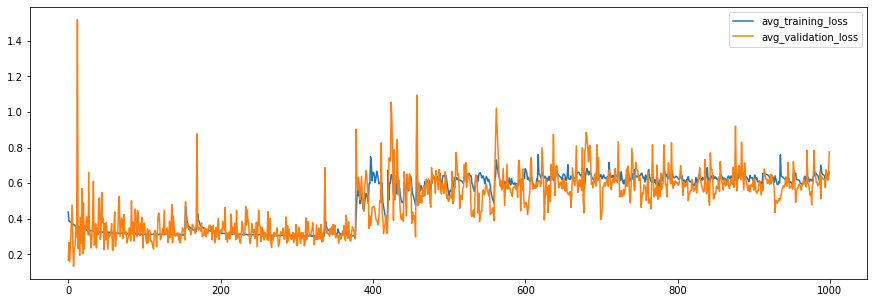

In [21]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(epoch_df['avg_training_loss'], label = "avg_training_loss")
plt.plot(epoch_df['avg_validation_loss'], label = "avg_validation_loss")
plt.legend()

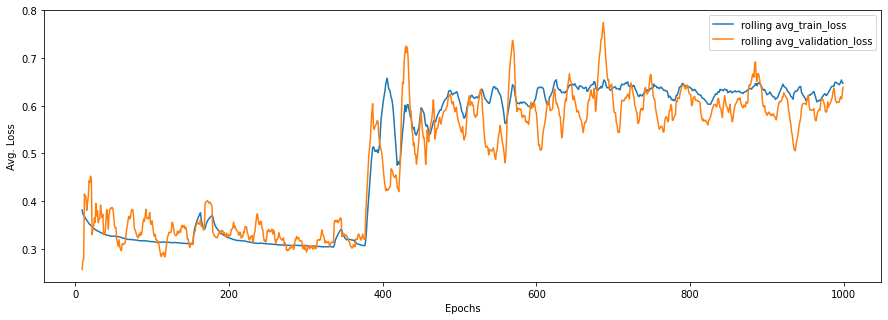

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(ravg_train, label = "rolling avg_train_loss")
plt.plot(ravg_val, label = "rolling avg_validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Avg. Loss")
plt.legend()

## Sliced

In [212]:
slc = [90,200]
w = 10
# Rolling avg. for validation loss
ravg_val = epoch_df.loc[slc[0]:slc[1], 'avg_validation_loss'].rolling(window=w).mean()
# Rolling avg. for Training loss
ravg_train = epoch_df.loc[slc[0]:slc[1], 'avg_training_loss'].rolling(window=w).mean()

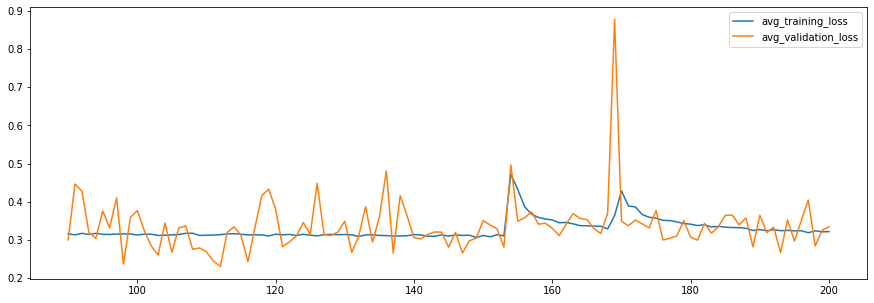

In [213]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(epoch_df.loc[slc[0]:slc[1],'avg_training_loss'], label = "avg_training_loss")
plt.plot(epoch_df.loc[slc[0]:slc[1],'avg_validation_loss'], label = "avg_validation_loss")
plt.legend()

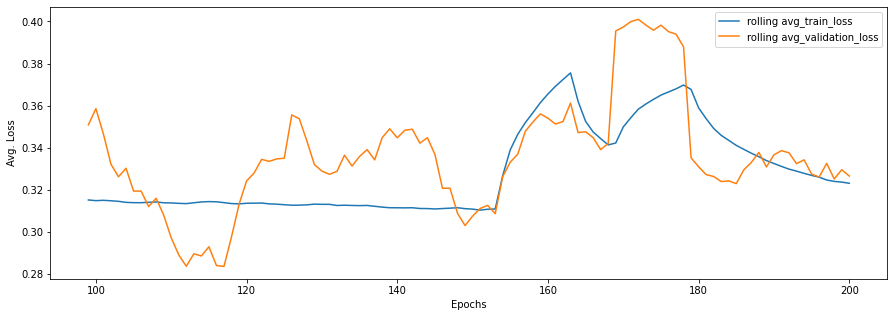

In [214]:
fig, ax = plt.subplots(1, 1, figsize = (15, 5))

plt.plot(ravg_train, label = "rolling avg_train_loss")
plt.plot(ravg_val, label = "rolling avg_validation_loss")
plt.xlabel("Epochs")
plt.ylabel("Avg. Loss")
plt.legend()

In [20]:
epoch_df.iloc[250:350, :]

,epoch_num,avg_loss
250,250,0.296084
251,251,0.292606
252,252,0.297105
253,253,0.296699
254,254,0.294594
...,...,...
345,345,0.287842
346,346,0.287937
347,347,0.282414
348,348,0.287777


In [25]:
epoch_df.sort_values("avg_loss", ascending=True)

,epoch_num,avg_loss
347,347,0.282414
358,358,0.282915
350,350,0.283049
355,355,0.283093
340,340,0.283446
...,...,...
364,364,0.537961
372,372,0.548731
369,369,0.563755
371,371,0.579615


In [5]:
# To be able to import the file
import sys
pathname="/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/DSA4262-frontasticfour/scripts"
if pathname not in sys.path:
    sys.path.append(pathname)
path_to_data = "/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/data/data.json"
path_to_labels = "/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/data/data.info"

In [8]:
import getDataCarel as gd
import importlib
importlib.reload(gd)

<module 'getDataCarel' from '/Users/carelchay/Desktop/School/Modules/DSA4262/Project 2/DSA4262-frontasticfour/scripts/getDataCarel.py'>

In [9]:
getDat = gd.getData(path_to_data=path_to_data, path_to_labels=path_to_labels)

In [10]:
label_df = getDat.get_labels()

# Compare predictions with Truth

In [47]:
import pandas as pd
import numpy as np
df = pd.read_csv("../../data/dataset0.csv")

In [48]:
pred_df.head()

,transcript_id,transcript_position,score,label,pred
0,ENST00000000233,244,0.071954,0,0
1,ENST00000000233,261,0.039076,0,0
2,ENST00000000233,316,0.035678,0,0
3,ENST00000000233,332,0.333933,0,0
4,ENST00000000233,368,0.407557,0,0


In [49]:
label_df.head()

,gene_id,transcript_id,transcript_position,label
1,ENSG00000004059,ENST00000000233,244,0
2,ENSG00000004059,ENST00000000233,261,0
3,ENSG00000004059,ENST00000000233,316,0
4,ENSG00000004059,ENST00000000233,332,0
5,ENSG00000004059,ENST00000000233,368,0


In [50]:
pred_df = pd.merge(df, label_df[['transcript_id', 'transcript_position', 'label']], 
                  how = 'left', on = ('transcript_id', 'transcript_position'))

In [15]:
any(pred_df['label'].isna())

False

In [25]:
# Threshold
thresh = 0.8
pred_df['pred'] = pred_df['score'].apply(lambda x : 1 if x>thresh else 0)
pred_df

,transcript_id,transcript_position,score,label,pred
0,ENST00000000233,244,0.071954,0,0
1,ENST00000000233,261,0.039076,0,0
2,ENST00000000233,316,0.035678,0,0
3,ENST00000000233,332,0.333933,0,0
4,ENST00000000233,368,0.407557,0,0
...,...,...,...,...,...
121833,ENST00000641834,1348,0.980508,1,1
121834,ENST00000641834,1429,0.062326,0,0
121835,ENST00000641834,1531,0.994412,1,1
121836,ENST00000641834,1537,0.447808,0,0


## Classification report

In [26]:
true_labels = pred_df['label'].to_list()
pred_labels = pred_df['pred'].to_list()

In [27]:
from sklearn import metrics
# Get AUC ROC score
fpr, tpr, thresholds = metrics.roc_curve(true_labels, pred_labels, pos_label=1)
auc_scorerf = metrics.auc(fpr, tpr)

# fpr, tpr, thresholds = metrics.roc_curve(y_test, dummypred, pos_label=1)
# auc_scoredummy = metrics.auc(fpr, tpr)

# Get PR Score
pr_scorerf = metrics.average_precision_score(true_labels, pred_labels, pos_label=1)
# pr_scoredummy = average_precision_score(y_test, dummypred, pos_label=1)

print(f"AUC Score : {auc_scorerf}")
print(f"PR Score : {pr_scorerf}")

AUC Score : 0.7943500603547465
PR Score : 0.3213280429630108


In [24]:
from sklearn.metrics import classification_report
print(classification_report(true_labels, pred_labels))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98    116363
           1       0.59      0.46      0.52      5475

    accuracy                           0.96    121838
   macro avg       0.78      0.72      0.75    121838
weighted avg       0.96      0.96      0.96    121838



In [182]:
pred_df['score'].describe()

count    256.000000
mean       0.148288
std        0.158737
min        0.000336
25%        0.038633
50%        0.077050
75%        0.212591
max        0.929638
Name: score, dtype: float64

In [183]:
divmod(12345, 60)

(205, 45)

In [31]:
pred_df

,transcript_id,transcript_position,score,label,pred
0,ENST00000000233,244,0.071954,0,0
1,ENST00000000233,261,0.039076,0,0
2,ENST00000000233,316,0.035678,0,0
3,ENST00000000233,332,0.333933,0,0
4,ENST00000000233,368,0.407557,0,0
...,...,...,...,...,...
121833,ENST00000641834,1348,0.980508,1,1
121834,ENST00000641834,1429,0.062326,0,0
121835,ENST00000641834,1531,0.994412,1,1
121836,ENST00000641834,1537,0.447808,0,0


In [188]:
q = pd.merge(pred_df, pred_df2, on = ("transcript_id", "transcript_position"), how='left')

In [190]:
q

,transcript_id,transcript_position,score_x,label,pred,score_y
0,ENST00000000233,244,0.001845,0,0,0.001877
1,ENST00000000233,261,0.605324,0,0,0.593156
2,ENST00000000233,316,0.005548,0,0,0.005560
3,ENST00000000233,332,0.257062,0,0,0.243638
4,ENST00000000233,368,0.062092,0,0,0.058775
...,...,...,...,...,...,...
251,ENST00000007264,1061,0.252586,1,0,0.252846
252,ENST00000007264,1066,0.559602,1,0,0.564825
253,ENST00000007264,1116,0.573830,1,0,0.573907
254,ENST00000007264,1293,0.529234,1,0,0.534067


## PLOT ROC & PR

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay
from sklearn.metrics import RocCurveDisplay

In [59]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

precision, recall, _ = precision_recall_curve(true_labels, scores)
auc_score = auc(recall, precision)
auc_score

0.5279897687646606

In [32]:
scores= pred_df['score']

In [33]:
roc_auc_score(true_labels, scores)

0.9488521233957805

### ROC

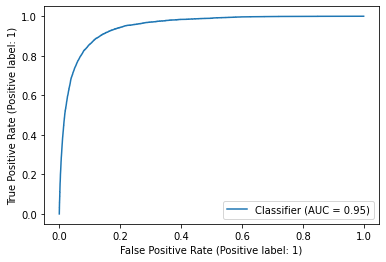

In [44]:
RocCurveDisplay.from_predictions(true_labels, scores)

### PR

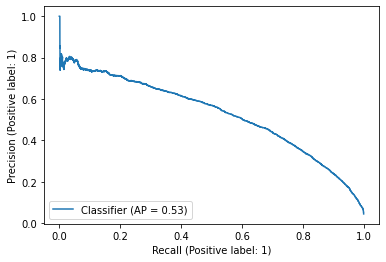

In [42]:
PrecisionRecallDisplay.from_predictions(true_labels, scores)

In [52]:
df.head()

,transcript_id,transcript_position,score
0,ENST00000000233,244,0.071954
1,ENST00000000233,261,0.039076
2,ENST00000000233,316,0.035678
3,ENST00000000233,332,0.333933
4,ENST00000000233,368,0.407557


## Compared to random

In [60]:
import random

In [72]:
size=df.shape[0]
rand_score = [random.uniform(0, 1) for i in range(size)]

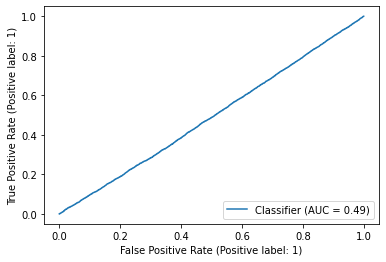

In [73]:
RocCurveDisplay.from_predictions(true_labels, rand_score)

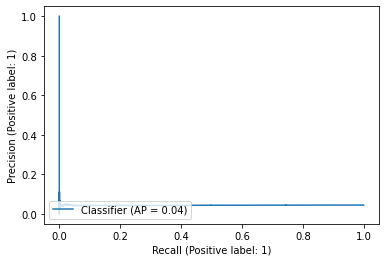

In [74]:
PrecisionRecallDisplay.from_predictions(true_labels, rand_score)